# Welcome to MATH 105A

The course webpage is [here](https://eee.uci.edu/17f/44635). 

There you'll find a link to a [GitHub repository](https://github.com/petermchale/math105A) where I will upload all the class materials. Let's take a look at the Syllabus...

Rather than emailing questions to the instructor/TAs, please post your questions on [Piazza](https://piazza.com/class/j829hcqsmdt4yp). 

# Lecture

The lecture for this course is largely theoretical but I will try to illustrate the ideas presented in lecture with concrete coded examples.

# Lab

In the lab we will work on problems that require the translation of the mathematical ideas introduced in lecture into practical code.

# Grading

## Math105A 
There will be quizzes (25%) based on the homework assignments, a midterm exam (25%), and a final exam (50%). 

## Math105LA
Computer assignments (50%), Lab project (50%). 



# A review of calculus

## Limits and continuity

###  Definition
A function $~f$ defined on a set $~X$ has limit $~L$ at $~x_0$

$$ \lim_{x\to x_0} f(x) = L $$

if, given any real number $\epsilon > 0$, there exists a real number $~\delta > 0$ such that

$$ |f(x) - L| < \epsilon, ~~ \text{ whenever } ~~ x \in X ~~ \text{ and } ~~ 0 < |x - x_0| < \delta. $$

If $f(x) = \sin (x)$ and we are given $\epsilon = 10^{-5}$, let's test to see what $\delta$ should be:

In [1]:
import numpy as np 

f = lambda x: np.sin(x)

epsilon = .00001;
x0 = 0;
x = 0.00001;

print(abs(f(x)-f(0)) < epsilon)

True


Roughly how small do you think $\delta$ should be?

#### Definition

Let $f$ be a function defined on a set $X$ of real numbers and $x_0 \in X$.  Then $f$ is _continuous_ at $x_0$ if

$$ \lim_{x \to x_0} f(x) = f(x_0) $$  

The set of all continuous functions defined on the set $X$ is denoted by $C(X)$ ($C[a,b]$ or $C(a,b]$ if $X$ is an interval).

The function $f(x) = |x|$ is continuous everywhere but the following function is not

$$ g(x) = \begin{cases} -1, & x < 0,\\ 1 & x \geq 0. \end{cases} $$

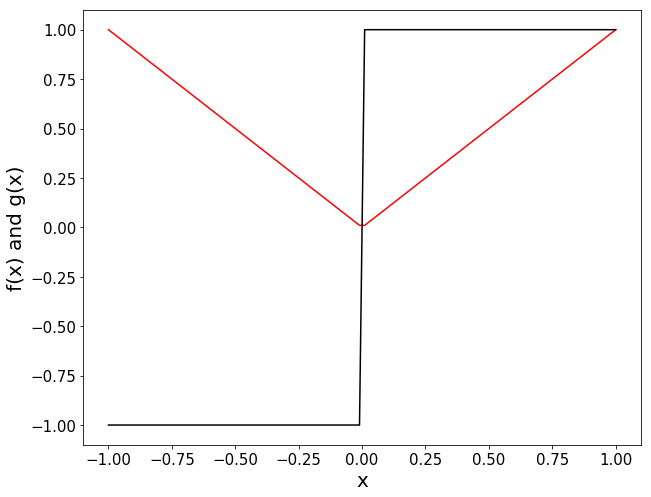

In [2]:
x = np.linspace(-1,1,100)
f, g = np.abs(x), np.sign(x)
from matplotlib import pyplot as plt
%matplotlib inline
import draw 
fig, ax, fontsize, fontsize_tick = draw.create_figure()
ax.plot(x,f,'r')
ax.plot(x,g,'k') 
ax.set_xlabel('x', fontsize=fontsize)
ax.set_ylabel('f(x) and g(x)', fontsize=fontsize)

#### Definition

Let $\{x_n\}_{n=1}^\infty$ be an infinite sequence of real numbers.  The sequence has a _limit_ $x$ (_converges_ to $x$) if for any $\epsilon > 0$ there exists a positive integer $N(\epsilon)$ such that $|x_n-x| < \epsilon$ whenever $n \geq N(\epsilon)$.  In this case, we write

$$ \lim_{n \to \infty} x_n = x, \quad \text{or} \quad x_n \to x ~~ \text{as} ~~ n \to \infty. $$  <br><br>

#### Theorem

If $f$ is defined on a set $X$ of real numbers and $x_0 \in X$, then the following are equivalent
1. $f$ is continuous at $x_0$
2. If $\{x_n\}_{n=1}^\infty$ is any sequence that converges to $x$ then $\lim_{n \to \infty} f(x_n) = f(x)$.

The function 

$$ f(x) = \begin{cases} \cos(\pi/x), & x \neq 0,\\ 1 & x = 0, \end{cases} $$

is not continuous at $x = 0$.  To show this, let $x_n = 1/n$.  If $f$ is continuous then $\lim_{n \to \infty} f(1/n) = 1$  

(<matplotlib.text.Text at 0x10e9eb080>, <matplotlib.text.Text at 0x113a029e8>)

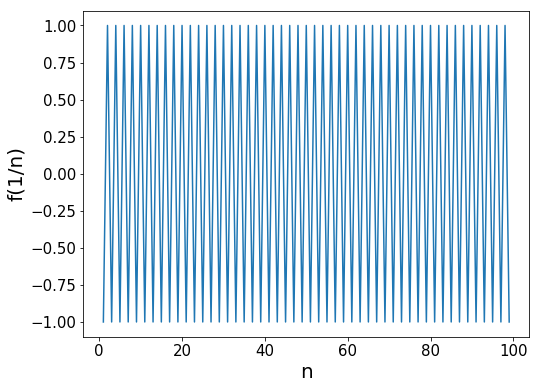

In [3]:
f = lambda x: np.cos(np.pi/x)
ns = np.arange(1,100)
fig, ax, fontsize, fontsize_tick = draw.create_figure(width=8, height=6)
ax.plot(ns, f(1/ns))
ax.set_xlabel('n', fontsize=fontsize), ax.set_ylabel('f(1/n)', fontsize=fontsize) 

The function 

$$ f(x) = \begin{cases} x\cos(\pi/x), & x \neq 0,\\ 0 & x = 0, \end{cases} $$

is continuous at $x = 0$.  To see this, again, let $x_n = 1/n$. (Note: taking one sequence does not prove continuity)

(<matplotlib.text.Text at 0x10d817828>, <matplotlib.text.Text at 0x113b545f8>)

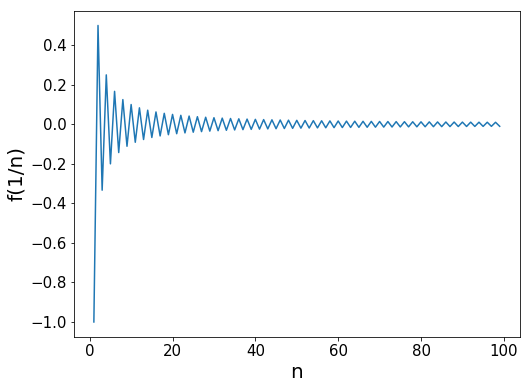

In [4]:
f = lambda x: x*np.cos(np.pi/x)
fig, ax, fontsize, fontsize_tick = draw.create_figure(width=8, height=6)
ax.plot(ns, f(1/ns))
ax.set_xlabel('n', fontsize=fontsize), ax.set_ylabel('f(1/n)', fontsize=fontsize) 

#### Theorem (Intermediate Value Theorem)

Let $f \in C[a,b]$.  Assume $f(a) \neq f(b)$.  For every real number $y$, $f(a) \leq y \leq f(b)$, there exists $c \in [a,b]$ such that $f(c) = y$.

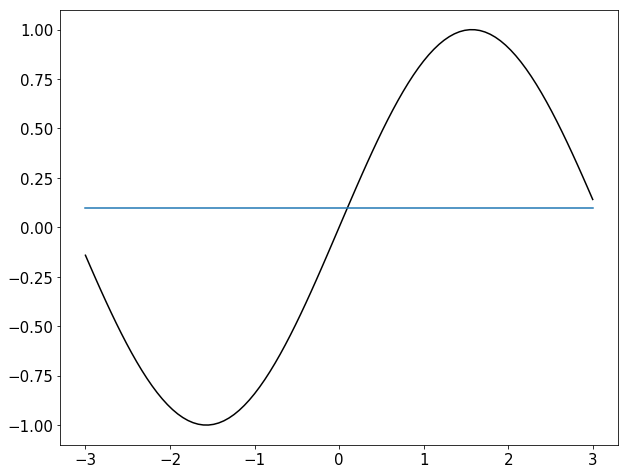

In [5]:
x = np.linspace(-3,3,100)
f = np.sin(x)
c = 0*x + 0.1
fig, ax, fontsize, fontsize_tick = draw.create_figure()
ax.plot(x, f, 'k')
ax.plot(x, c) # every value between f(-3) and f(3) is attained at least once

### Differentiability<br><br>

#### Definition

Let $f$ be a function defined on an open interval containing $x_0$.  The function $f$ is _differentiable_ at $x_0$ if

$$ f'(x_0) = \lim_{x \to x_0} \frac{f(x) - f(x_0)}{x-x_0} $$

exists. In which case, $f'(x_0)$ is the derivative of $f(x)$ at $x_0$.  If $f$ has a derivative at each point in a set $X$ then $f$ is said to be _differentiable on_ $X$.

In [6]:
x = 0.001; x0 = 0;
(np.sin(x)-np.sin(x0))/(x-x0) - np.cos(x0)

-1.6666665836329031e-07

Here are some of the most important theorems from single-variable calculus:<br><br>

#### Theorem 
If a function $f$ is differentiable at $x_0$, it is continuous at $x_0$.<br><br>


#### Theorem (Rolle's Theorem)
Suppose $f \in C[a,b]$ and $f$ is differentiable on $[a,b]$.  If $f(a) = f(b)$, the a number $c$ in $(a,b)$ exists with $f'(c) = 0$.<br><br>


#### Theorem (Mean Value Theorem)
Suppose $f \in C[a,b]$ and $f$ is differentiable on $[a,b]$.  There exists a point $c \in (a,b)$ such that

$$ f'(c) = \frac{f(b) - f(a)}{b-a}.$$

#### Theorem (Extreme Value Theorem)

If $f \in C[a,b]$, then $c_1,c_2 \in [a,b]$ exist with $f(c_1) \leq f(x) \leq f(c_2)$, for all $x \in [a,b]$.  Furthermore, if $f$ is differentiable on $[a,b]$ then $c_1,c_2$ are either the endpoints ($a$ or $b$) or at a point where $f'(x) = 0$.


This theorem states that both the maximum and minimum values of $f(x)$ on a closed interval $[a,b]$ must be attained within the interval (at points $c_2$ and $c_1$).

A more involved theorem is the following:

#### Theorem (Generalized Rolle's Theorem)

Suppose $f \in C[a,b]$ is $n$-times differentiable on $(a,b)$.  If $f(x) = 0$ at $n+1$ distinct numbers $a \leq x_0 < x_1 < \cdots < x_{n} \leq b$, then a number $c \in (x_0,x_n)$, (and hence in $(a,b)$) exists with $f^{(n)}(c) = 0$.

Consider the 4th degree polynomial $f(x) = 8x^4-8x^2 + 1$:

([<matplotlib.lines.Line2D at 0x1140c7780>],
 <matplotlib.text.Text at 0x114100c50>)

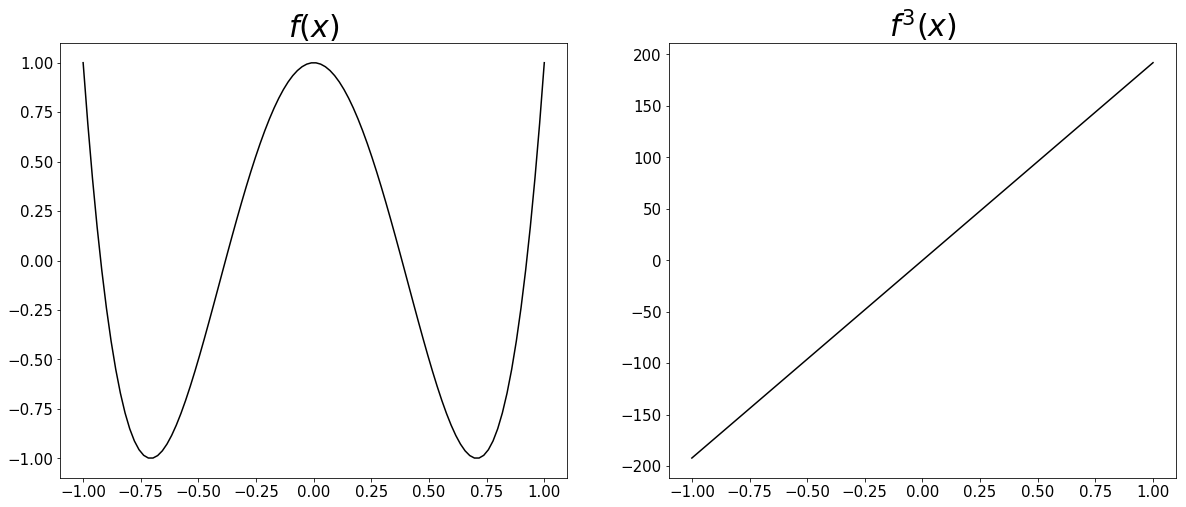

In [7]:
x = np.linspace(-1,1,100)
f = 8*x**4 - 8*x**2 + 1 # has four zeros
dddf = 8*4*3*2*x; # should have at least 1 zero 
fig, ax1, ax2, fontsize, fontsize_tick = draw.create_two_figures(fontsize=30)
ax1.plot(x, f, 'k'), ax1.set_title('$f(x)$', fontsize=fontsize)
ax2.plot(x, dddf, 'k'), ax2.set_title('$f^3(x)$', fontsize=fontsize)

### Integration

#### Definition

The _Riemann integral_ of the function $f$ defined on the interval $[a,b]$ is the following limit (if it exists):

$$ \int_a^b f(x) dx = \lim_{\max \Delta x_i \to 0} \sum_{i=1}^n f(\bar x_i) \Delta x_i,$$

where the numbers $x_0,x_1,\ldots,x_n$ satisfy $a = x_0 \leq x_1 \leq \cdots \leq x_n = b$, $\Delta x_i = x_i - x_{i-1}$ for $i =  1,2,\ldots,n$.  And $\bar x_i$ is an arbitrary point in the interval $[x_{i-1},x_i]$.

Let's choose the points $x_i$ to be evenly spaced: $x_i = a + i\frac{b-a}{n}$ and $\bar x_i = x_{i}$.  Then we have $\Delta x_i = \frac{b-a}{n}$ and

$$\int_a^b f(x) dx = \lim_{n \to \infty} \frac{b-a}{n} \sum_{i=1}^n f(x_{i}).$$

In [11]:
f = lambda x: np.exp(x)
n = 10
a = -1
b = 1
x = np.linspace(a, b, n+1)
x = x[1:]
estimate = ((b-a)/n)*np.sum(f(x))
actual = np.exp(b) - np.exp(a) 
np.abs(estimate-actual)

0.24286969520606361

Now choose $\bar x_i = \displaystyle \frac{x_{i}+x_{i-1}}{2}$ to be the midpoint.  We still have $\Delta x_i = \frac{b-a}{n}$ and

$$\int_a^b f(x) dx = \lim_{n \to \infty} \frac{b-a}{n} \sum_{i=1}^n f(\bar x_{i}).$$

In [10]:
f = lambda x: np.exp(x)
n = 10
x = np.linspace(a, b, n+1)
x = x[1:] 
x = x - (b-a)/float(2*n) # shift to the midpoint
estimate = (b-a)/n*np.sum(f(x)) 
actual = np.exp(b) - np.exp(a) 
abs(estimate-actual)

0.0039127718992975069

#### Theorem (Weighted Mean Value Theorem)

Suppose $f \in C[a,b]$, the Riemann integral of $g$ exists on $[a,b]$, and $g(x)$ does not change sign on $[a,b]$.  Then there exists a number $c$ in $(a,b)$ with

$$ \int_a^b f(x) g(x) dx = f(c) \int_a^b g(x) dx. $$

#### Theorem (Taylor's Theorem)

Suppose $f \in C^n[a,b]$, and that $f^{(n+1)}$ exists on $[a,b]$, and $x_0 \in [a,b]$.  For every $x \in [a,b]$, there exists a number $\xi(x)$ between $x_0$ and $x$ with

$$ f(x) = P_n(x) + R_n(x),$$

where

$$ P_n(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!} (x-x_0)^2 + \cdots + \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n,$$

and

$$ R_n(x) = \frac{f^{(n+1)}(\xi(x))}{(n+1)!} (x-x_0)^{n+1}. $$